# 🗓️ Semana 4: Análisis de Series de Tiempo con Modelos ARIMA, ARMA y SARIMAX 📈

## 🎯 Objetivo de la Semana
Durante esta semana, exploraremos el **análisis de series de tiempo**, una herramienta esencial en la **analítica predictiva** que nos permite comprender, modelar y predecir comportamientos basados en datos recogidos en intervalos de tiempo regulares.

## 📊 Contenidos
Nos enfocaremos en tres técnicas fundamentales para modelar y predecir **series temporales**:

- **ARIMA (Autoregressive Integrated Moving Average)**: Un modelo potente que combina **autoregresión (AR)**, **promedio móvil (MA)** y un componente de **integración** para hacer que las series se vuelvan estacionarias. Este modelo es ideal para datos que presentan **tendencias**.
  
- **ARMA (Autoregressive Moving Average)**: Similar a ARIMA pero sin el componente de integración. ARMA es utilizado para series temporales que ya son **estacionarias**, combinando términos **autoregresivos** y de **promedio móvil** para capturar la dinámica temporal.

- **SARIMAX (Seasonal Autoregressive Integrated Moving Average with Exogenous Variables)**: Este modelo extiende ARIMA para capturar la **estacionalidad** y permite incorporar **variables exógenas** que afectan el comportamiento de la serie. Es útil cuando el objetivo es modelar patrones estacionales y entender cómo factores externos influyen en la serie.

## 🤔 ¿Por Qué Aprender Sobre Series de Tiempo?
Las **series de tiempo** son cruciales para el análisis predictivo porque permiten prever el comportamiento futuro basándose en patrones históricos. Este tipo de análisis es útil en **finanzas** (por ejemplo, para predecir precios de acciones), **ventas** (para estimar la demanda de productos) o incluso en la **meteorología** (para predecir el clima).

Durante esta semana, aprenderemos a:
- Entender los conceptos básicos de las **series de tiempo**.
- Aplicar modelos como **ARIMA, ARMA y SARIMAX** para modelar y predecir datos.
- Evaluar la **calidad del ajuste** y realizar **predicciones** que puedan servir para la **toma de decisiones** empresariales.

## 🚀 Actividad Práctica
Trabajaremos con un conjunto de datos que contiene información histórica sobre ventas mensuales de una empresa. Utilizaremos nuestros modelos para:
1. **Identificar patrones y estacionalidades**.
2. **Ajustar el mejor modelo** para los datos.
3. **Hacer predicciones** para el próximo año y así apoyar las decisiones de negocio.

Esta semana nos adentraremos en el mundo de las **predicciones temporales**, una habilidad que nos permitirá anticipar cambios y preparar estrategias más efectivas a nivel empresarial.


# Análisis de series de tiempo

Una de las principales preguntas que puede surgir al momento de iniciar esta semana, es el por qué de esta nueva sección que analiza de forma diferente los datos cuando ya hemos cubierto problemas donde la variable es de corte numérica y contínua en el modelo de Regresión Lineal.

La principal respuesta es que el análisis de series de tiempo reconoce la autocorrelación entre eventos de tiempo, que  pudiese existir, mientras que en el modelo de Regresión Lineal asumimos, o minimizamos, la independencia de los errores de serie analizada. Por ello, una de las principales diferencias entre el enfoque de regresión lineal y el de series de tiempo es que en el primero, estudiamos a una variable que está ordenada en el tiempo, mientras que en el modelo de Regresión Lineal, no siempre es así. Recordemos el ejemplo del precio de los inmuebles, que consistía en el análisis de esos datos sin la variable de tiempo.

Sin embargo, esto no quiere decir que _no_ podemos aplicar modelos de regresión a series temporales, si quisiéramos tomar esa vía, lo que se recomienda es que la autocorrelación sea nula o baja, o se encuentre una variable oculta que explique la autocorrelación. De igual forma, se recomienda incluir variables transformadas, como la diferenciación de la serie, o variables estacionales ficticias para controlar por los componentes de tendencia o cíclicos en el modelo de regresión, pero esto lo acerca más al análisis de series de tiempo que al de regresión.


De hecho, una de las razones para usar modelos series de tiempo, es que es poco probable que se cumplan los supuestos de error que subyacen en el modelo de regresión lineal, en particular la falta de correlación serial.



### Conceptos

- Regresión: Es una herramienta utilizada para evaluar la relación de una variable dependiente en relación con múltiples variables independientes, es decir, su objetivo es inferir las relaciones que existen entre la variable dependiente y las variables independentes, por lo que la regresión analizará la media de la variable dependiente en relación con los cambios en las variables independientes
- Serie de tiempo: Mide los datos de una serie durante un período de tiempo específico, por lo que el valor del período de tiempo anterior es (casi siempre) un buen predictor del valor del período actual


#### ¿Entonces qué es una serie de tiempo y dónde está su valor agregado?

Series de tiempo es el estudio de aquellos datos que *dependen del tiempo o que cambian con el tiempo*. Este particular nos permite usar como insumo a los valores pasados para predecir el futuro a través de patrones que se repiten con el tiempo. Cabe recalcar que esta predicción, también incluirá al tiempo como variable.

Una forma sencilla de evaluar si una serie podría ser un buen candidato para el análisis por series de tiempo consiste en evaluar si la serie se recopila en intervalos de tiempo regulares, si adicionalmente al graficarla, uno de los ejes corresponde al tiempo, estaríamos frente a un buen candidato para este tipo de análisis.

Por lo general, en los modelos regulares iniciamos la modelización ignorando la causa de la variación de nuestra variable dependiente, mientras que en las series temporales, algunas de las causas de variación del modelo son deterministas.

Un dato importante de las series de tiempo es que requieren que los datos sean estacionarios, en otras palabras, que la media y la desviación estándar de la serie sean constantes a lo largo del tiempo.

### Los datos

En el presente script, trabajaremos con acciones de Tesla por lo que importaremos la serie directamente de Yahoo Finance: https://finance.yahoo.com/quote/TSLA?p=TSLA&.tsrc=fin-srch, si prefieren importar la serie directamente a nuestro entorno de trabajo, por favor instalen el module: pandas-datareader, via pip para que podamos llamarlo localmente.

In [1]:
#Llamemos al module
!pip install yfinance

#### Carguemos los datos

In [2]:
import yfinance as yf

# Set the ticker symbol
ticker_symbol = 'TSLA'

# Request the data from Yahoo Finance
df = yf.download(ticker_symbol)

# Print the data info
print(df.info())

[*********************100%***********************]  1 of 1 completed

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3591 entries, 2010-06-29 to 2024-10-03
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3591 non-null   float64
 1   High       3591 non-null   float64
 2   Low        3591 non-null   float64
 3   Close      3591 non-null   float64
 4   Adj Close  3591 non-null   float64
 5   Volume     3591 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 196.4 KB
None


Perfecto hemos recopilado la data de las cotizaciones diarias de las acciones de Tesla desde el año 2010  hasta el presente año, mes y día, por lo que tenemos un total de 3240 observaciones sin valores perdidos y 5 columnas: su valor a la apertura en la bolsa, el valor máximo de cotización en ese día, el valor mínimo de cotización en ese d8ía, el precio de cierre, el precio ajustado de cierre, que refleja el valor de esa acción después de contabilizar cualquier acción corporativa en ese día, y el volumen de las acciones que se comercializaron.

Como es habitual procedamos a reemplazar los nombres de las columnas a español:

#### Recodificar el nombre de las columnas a español

In [3]:
df.rename({'Open':'precio_apertura', 'High':'precio_max', 'Low': 'precio_min',
           'Close': 'precio_cierre', 'Adj Close':'precio_ajustado_cierre', 'Volume': 'Volumen'}, axis=1, inplace=True)

In [4]:
df

,precio_apertura,precio_max,precio_min,precio_cierre,precio_ajustado_cierre,Volumen
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...
2024-09-27,257.380005,260.700012,254.119995,260.459991,260.459991,70988100
2024-09-30,259.040009,264.859985,255.770004,261.630005,261.630005,80705700
2024-10-01,262.670013,263.980011,248.529999,258.019989,258.019989,87397600


#### Importemos las librerías necesarias

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

#### Grafiquemos nuestras series de tiempo

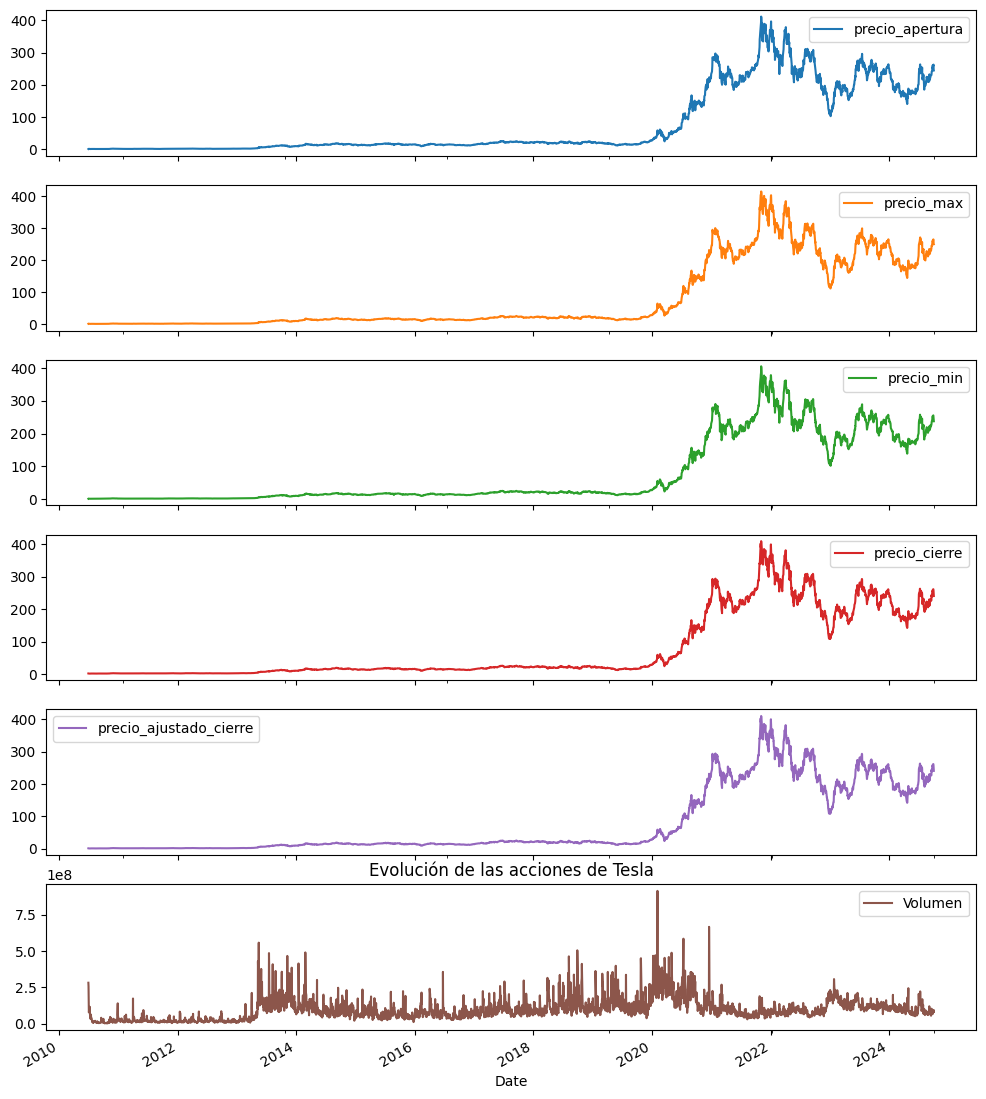

In [6]:
df.plot(subplots=True, figsize=(12,15))
plt.title('Evolución de las acciones de Tesla')

plt.show()

# Los cuatro componentes de una serie de tiempo

Dado que el análisis de series de tiempo implica comprender varios aspectos sobre la naturaleza de la serie para predecir valores futuros, a continuación se presentan los cuatro componentes teóricos de las series de tiempo que corresponden a sus características.

### 1. Tendencia o componente tendencial

El componente de tendencia recoge las variaciones en los datos con la variable de tiempo o la frecuencia de los datos, por lo que le permite analizar el aumento o la disminución de los datos a lo largo del tiempo.
Como ejemplos podríamos tener a las cotizaciones en bolsa de las acciones de las empresas, las ventas, entre otras.



En otras palabras, la tendencia es la dirección a largo plazo de la serie temporal y visualmente cuando hay una tendencia marcada se assemeja a la siguiente figura:

![image.png](https://raw.githubusercontent.com/marcecevallos/UDLA_Analitica_predictiva/main/An%C3%A1lisis%20de%20series%20de%20tiempo/tendencia.png)

_Fuente: Australian transport assessment and planning: Forecasting and evaluation_

### 2. Ciclo o componente cíclico

Son oscilaciones o componentes recurrentes en la serie de tiempo que pueden o no ser periódicas. Si las oscilaciones duran más de un año se consideran cíclicas.

Este componente, suelen representar a las etapas de bonanza económica así también como las crisis económicas, sin embargo, los ciclos económicos resultan difícil de reconocer, por lo que en la práctica, muchas veces no se consiguen separar de la tendencia y visualmente se representa así:

![image.png](https://raw.githubusercontent.com/marcecevallos/UDLA_Analitica_predictiva/main/An%C3%A1lisis%20de%20series%20de%20tiempo/ciclo.png)

_Fuente: Australian transport assessment and planning: Forecasting and evaluation_

### 3. Estacionalidad o componente estacional

La estacionalidad es el componente periódico de la serie de tiempo que ocurre dentro de un año, que identifica a las variaciones que ocurren a intervalos regulares de tiempo, como ocurren alrededor del mismo período de tiempo. Como ejemplos tenemos a feriados, temporadas, festivales, entre otros.

Visualmente el componente estacional se ve aprecia como la siguiente figura:


![image.png](https://raw.githubusercontent.com/marcecevallos/UDLA_Analitica_predictiva/main/An%C3%A1lisis%20de%20series%20de%20tiempo/seasonal.png)

_Fuente: Australian transport assessment and planning_

#### Propiedad de estacionariedad

Una serie de tiempo que tiene las mismas propiedades estadísticas a lo largo del tiempo es estacionaria, requisito en el análisis de series de tiempo.

Este es un requisito, en la medida que en su ausencia, un modelo que describa los datos variará en precisión en diferentes momentos, por lo que para que el modelo sea confiable, la media, varianza y correlaciones, deben poder describir con precisión los datos en todos los puntos de interés en el tiempo.

### 4. Componente irregular

El componente irregular corresponde a las variaciones aleatorias en la serie de tiempo. Es conocido también como "ruido" y recoge alteraciones de la serie, que no responden a ninguno de los anteriores componentes, por lo que recoge todo lo que no queda explicado por el modelo. Como ejemplos de este componente podemos tener a circunstancias imprevistas como desastres naturales o pandemias de corta duración.

Gráficamente se visualizan como:

![image.png](https://raw.githubusercontent.com/marcecevallos/UDLA_Analitica_predictiva/main/An%C3%A1lisis%20de%20series%20de%20tiempo/ruido.png)

_Fuente: Australian transport assessment and planning_

En sí el componente irregular, o error es lo que queda de la serie temporal después de eliminar los otros componentes y la estacionariedad.

Por lo que, la serie de los residuos, es una serie temporal también que recoge la diferencia entre un valor observado y un valor predicho, a partir de un modelo de serie temporal, en un momento determinado. El punto clave es que si nuestro modelo de serie de tiempo, es capaz de explicar la correlación serial en las observaciones, entonces los residuos no están correlacionados serialmente.

Esto significa que cada elemento de la serie residual no correlacionada en la serie es una realización independiente de alguna distribución de probabilidad. Es decir, los residuos mismos son independientes e idénticamente distribuidos (i.i.d.). Esto nos lleva al concepto de Random Walk.

### Random Walk o paseo aleatorio

Un paseo aleatorio es un modelo de series de tiempo en el que la observación actual es igual a la observación anterior con un paso aleatorio hacia arriba o hacia abajo, por lo que la serie no se puede predecir sobre la base de la historia pasada. En otras palabras, es un proceso estocástico que consiste en la suma de una secuencia de cambios en una variable aleatoria. Estos cambios no están correlacionados con cambios pasados, lo que significa que no existe un patrón en los cambios en la variable aleatoria y estos cambios no se pueden predecir.

Se define formalmente a continuación:

$$ X_t = X_{t_-1} + w_t $$

Donde 𝑤𝑡 es ruido blanco o una serie de tiempo donde los elementos son independientes e idénticamente distribuidos (i.i.d.), con una media de cero, varianza y sin correlación serial, entonces decimos que la serie temporal es un ruido blanco discreto (DWN). En resumen, el ruido blanco es cualquier distribución que tenga:
- Cero media
- Una varianza/desviación estándar constante (no cambia con el tiempo)
- Autocorrelación cero en todos los retrasos

Por lo que, es una serie de números aleatorios y, por definición, ningún algoritmo puede modelar razonablemente su comportamiento.

_Nota No.2: Una confusión común es pensar en una caminata aleatoria es una simple secuencia de números aleatorios. Este no es el caso porque, en una caminata aleatoria, cada paso depende del paso anterior. Por esta razón, la autocorrelación es distinta de cero._

##  Descomposición de la serie de tiempo por el modelo de Aditivo

El valor de la serie temporal suele ser una combinación de los componentes anteriores en cualquier punto del tiempo, y pueden ser producto de la suma de todos los componentes, la multiplicación o una interacción entre las dos operaciones. Por ello, existen tres modelos comunmente usados en el análisis de series de tiempo:

Un modelo aditivo sugiere que los componentes de las serie de tiempo se pueden adicionar ya que  la amplitud de las variaciones estacionales e irregulares no cambia a medida que el nivel de la tendencia sube o baja. En tales casos, un modelo aditivo es apropiado.

Matemáticamente se describe como:

$$ Y(t) = Tendencia + estacionalidad + ciclo + componente.irregular $$

 Si la estacionalidad y los residuos son independientes de la tendencia en la serie de tiempo graficada, usamos un modelo aditivo para descomponer los datos. Gráficamente un modelo aditivo se asemeja a la siguiente figura:

![image.png](https://raw.githubusercontent.com/marcecevallos/UDLA_Analitica_predictiva/main/An%C3%A1lisis%20de%20series%20de%20tiempo/additive%20vs%20multiplicative.png)

_Fuente: Analyticsvidhya: Time Series Forecasting | Various Forecasting Techniques_

_Nota No. 1: La diferencia entre el modelo aditivo y el multiplicativo, radica en su estructura, tal como el aditivo suma todos los componentes, el modelo multiplicativo los multiplica: 𝑌(𝑡)= 𝑇𝑒𝑛𝑑𝑒𝑛𝑐𝑖𝑎 * 𝑐𝑖𝑐𝑙𝑜 * 𝑒𝑠𝑡𝑎𝑐𝑖𝑜𝑛𝑎𝑙𝑖𝑑𝑎𝑑 * 𝑐𝑜𝑚𝑝𝑜𝑛𝑒𝑛𝑡𝑒.𝑖𝑟𝑟𝑒𝑔𝑢𝑙𝑎𝑟_

_Un modelo aditivo es lineal, donde los cambios a lo largo del tiempo se realizan de manera constante en la misma cantidad. Por su parte, en los modelos multiplicativos, los cambios aumentarían o disminuirían de forma no lineal con el tiempo, siendo estos cuadráticos o exponenciales._

## Manejo y descomposición de la serie en Python

#### Visualización de la serie de tiempo

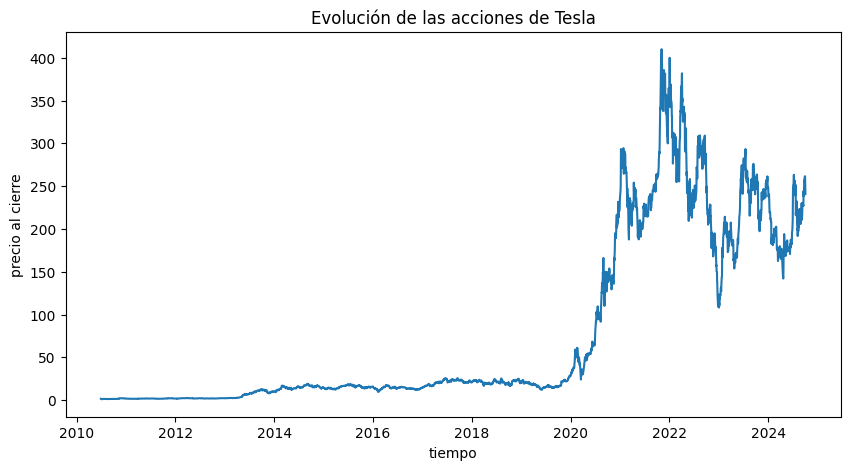

In [7]:
plt.figure(figsize=(10,5))
plt.plot(df.precio_cierre)
plt.title("Evolución de las acciones de Tesla")
plt.xlabel("tiempo")
plt.ylabel("precio al cierre")
plt.show()

Como podemos observar, la evolución de las acciones al cierre de TESLA a partir de 2020 se asemeja más a un modelo aditivo que a uno multiplicativo. Sin embargo, los datos desde su cotización en bolsa hasta antes del año 2020, son relativamente planos.

Apriori a partir del año 2020 notamos que la serie tiene una tendencia creciente y parece tener un componente cíclo dentro de un período menor a un año por lo que podríamos jugar con el argumento de período en nuestro análisis a seguir.

In [8]:
df['fecha'] = pd.to_datetime(df.index)

In [9]:
df.fecha[0]

Timestamp('2010-06-29 00:00:00')

In [10]:
df.describe()

,precio_apertura,precio_max,precio_min,precio_cierre,precio_ajustado_cierre,Volumen,fecha
count,3591.000000,3591.000000,3591.000000,3591.000000,3591.000000,3.591000e+03,3591
mean,77.399767,79.094566,75.596583,77.383336,77.383336,9.674558e+07,2017-08-15 02:54:26.165413376
min,1.076000,1.108667,0.998667,1.053333,1.053333,1.777500e+06,2010-06-29 00:00:00
25%,11.787667,12.059000,11.526000,11.855333,11.855333,4.832550e+07,2014-01-22 12:00:00
50%,17.598667,17.850668,17.340000,17.593332,17.593332,8.203590e+07,2017-08-15 00:00:00
75%,171.354996,174.989998,167.415001,171.540001,171.540001,1.224836e+08,2021-03-10 12:00:00
max,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08,2024-10-03 00:00:00
std,103.242033,105.530173,100.753314,103.172335,103.172335,7.821015e+07,NaN


In [11]:
df.isna().sum()

,0
precio_apertura,0
precio_max,0
precio_min,0
precio_cierre,0
precio_ajustado_cierre,0
Volumen,0
fecha,0


### Descomposición de las acciones de TESLA

Como la mayoría de las series de tiempo no son estacionales, y este es un requisito para modelarlas, tenemos que recurrir a técnicas de descomposición para separar los componentes y lograr que los componentes no dependan del tiempo.

Existen varios métodos para lograr el acometido, por ejemplo: remover la tendencia con trasnformaciones a la data, restar rolling means, o realizar el análisis de descomposición de componentes por statsmodels:

Comencemos con la descomposición de las acciones de TESLA en Python, para ello por favor instalen el module seasonal_decompose via pip.

![image.png](https://raw.githubusercontent.com/marcecevallos/UDLA_Analitica_predictiva/main/An%C3%A1lisis%20de%20series%20de%20tiempo/pip_seasonal_decompose.png)

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9

El argumento de period es uno de los más importantes de esta función, y aunque no tenemos forma de conocerlo, podemos intuirlo. Varios artículos sugieren que cuando se tiene datos diarios como en nuestro caso se pruebe con 3 opciones:

- 5  : porque ese es el número de días que la bolsa se encuentra abierta por semana,
- 20 : porque es el número de días que  la bolsa se encuentra abierta por mes, y
- 253: porque es el número de días que  la bolsa se encuentra abierta por año aproximadamente

Para este ejemplo, iniciaremos con la de menor granuladidad para observar qué resultados obtenemos.

In [13]:
c = df[df['fecha'].dt.year >= 2019]

In [14]:
c

,precio_apertura,precio_max,precio_min,precio_cierre,precio_ajustado_cierre,Volumen,fecha
Date,,,,,,,
2019-01-02,20.406668,21.008667,19.920000,20.674667,20.674667,174879000,2019-01-02
2019-01-03,20.466667,20.626667,19.825333,20.024000,20.024000,104478000,2019-01-03
2019-01-04,20.400000,21.200001,20.181999,21.179333,21.179333,110911500,2019-01-04
2019-01-07,21.448000,22.449333,21.183332,22.330667,22.330667,113268000,2019-01-07
2019-01-08,22.797333,22.934000,21.801332,22.356667,22.356667,105127500,2019-01-08
...,...,...,...,...,...,...,...
2024-09-27,257.380005,260.700012,254.119995,260.459991,260.459991,70988100,2024-09-27
2024-09-30,259.040009,264.859985,255.770004,261.630005,261.630005,80705700,2024-09-30
2024-10-01,262.670013,263.980011,248.529999,258.019989,258.019989,87397600,2024-10-01


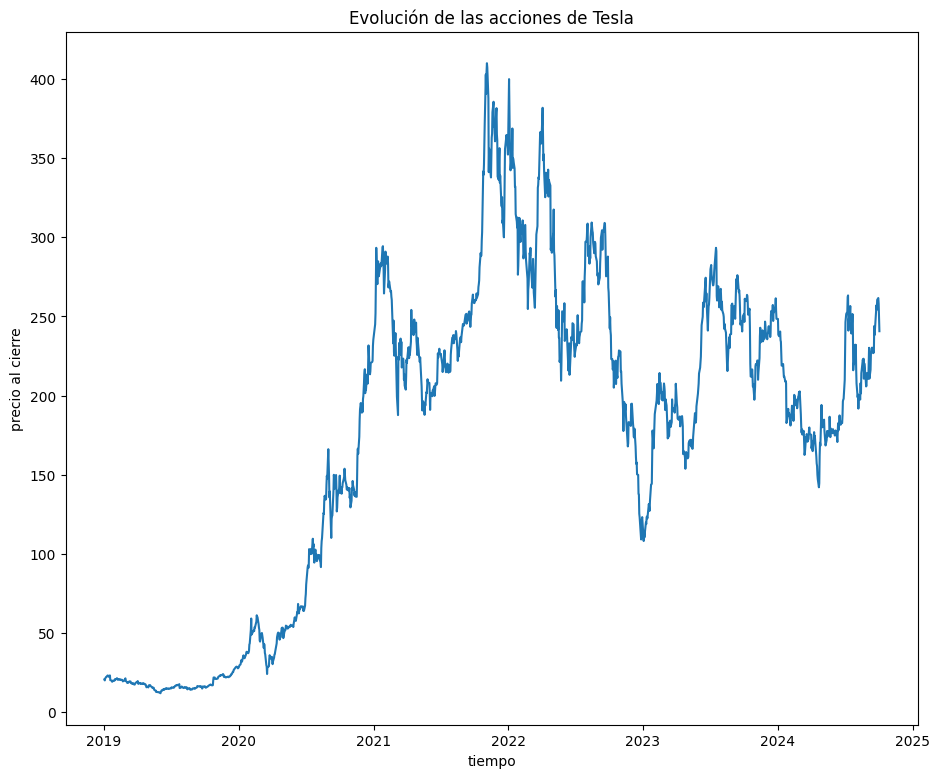

In [15]:
plt.plot(c.precio_cierre)
plt.title("Evolución de las acciones de Tesla")
plt.xlabel("tiempo")
plt.ylabel("precio al cierre")
plt.show()

In [16]:
result1 = seasonal_decompose(df.precio_cierre[df.index>"2020"], model='additive', period=253)
# La frecuencia es diaria
# period=253 indicaría que estás buscando patrones estacionales anuales en los datos.

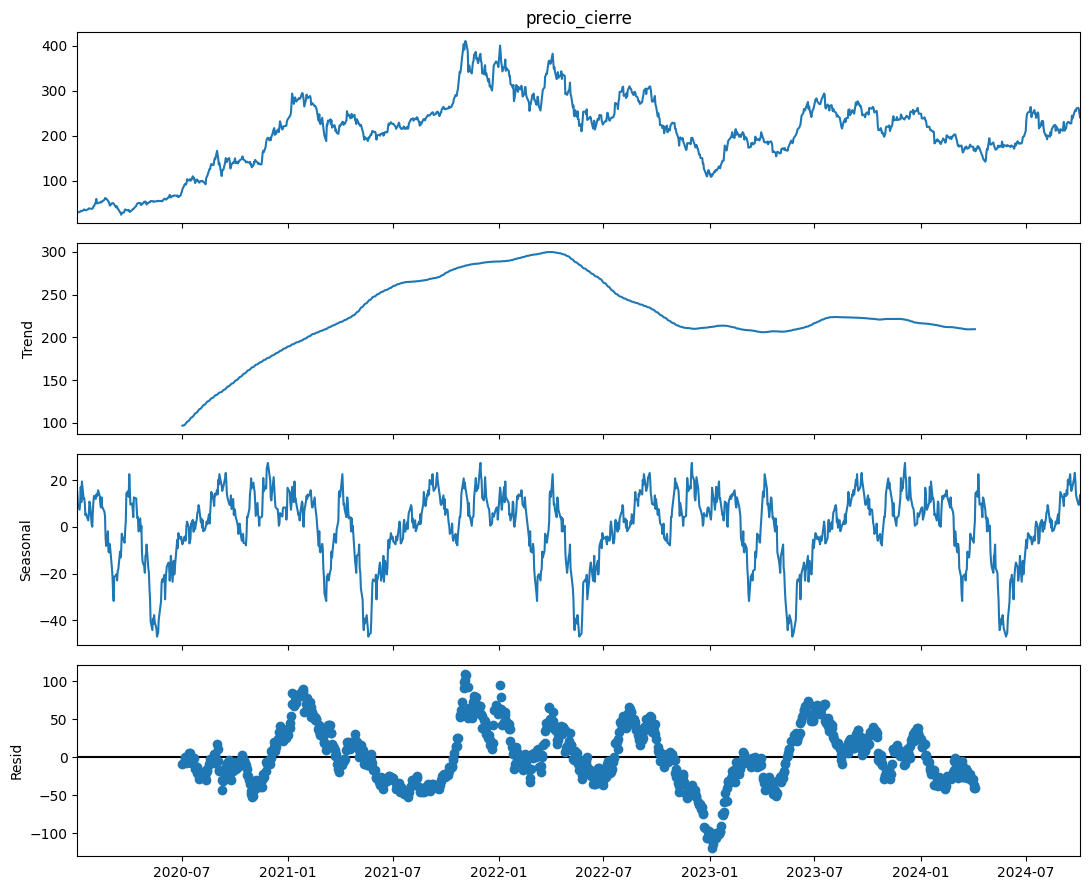

In [17]:
result1.plot()
plt.show()

La primera gráfica representa nuestra serie de Tesla original, mientras que el segundo gráfico representa la tendencia de nuestro modelo de serie temporal extraído de la serie original. Finalmente, los gráficos tercero y cuarto representan la estacionalidad y los componentes residuales en la misma serie de tiempo.

Perfecto! Interpretemos los gráficos de resultados:

- Del gráfico de tendencia observamos que efectivamente existe una tendencia creciente
- Del gráfico de ciclo, se puede observar de igual manera que existe un componente estacional
- Del gráfico de los residuos, el componente  parece ser aleatorio

#### Extraigamos los componentes de la serie de tiempo

In [18]:
tendencia1 = result1.trend
estacional1 = result1.seasonal
residuo1 = result1.resid

In [19]:
tendencia1.isnull().sum()

252

In [20]:
pd.set_option('display.max_rows', None)

In [21]:
residuo1

,resid
Date,
2020-01-02,NaN
2020-01-03,NaN
2020-01-06,NaN
2020-01-07,NaN
2020-01-08,NaN
2020-01-09,NaN
2020-01-10,NaN
2020-01-13,NaN
2020-01-14,NaN


#### Rolling centered window

Este comportamiento se da por la ventana deslizante centrada a los datos, así, si se tiene:

10,20,30,40,50  y se aplica la ventana deslizante de tamaño 3, la primera ventana será 10,20,30, y el valor se colocará en el segundo dato y así sucesivamente

#### Importemos la prueba de Dickey Fuller para validar estacionariedad

In [22]:
from statsmodels.tsa.stattools import adfuller

In [23]:
X1 = residuo1.dropna()
result_DF = adfuller(X1)
print('ADF Statistic: %f' % result_DF[0])
print('p-value: %f' % result_DF[1])
print('Critical Values:')
for key, value in result_DF[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.688716
p-value: 0.004275
Critical Values:
	1%: -3.437
	5%: -2.865
	10%: -2.568


H0: La serie tiene una raíz unitaria (no estacionaria)

H1:  La serie no tiene una raíz unitaria (estacionaria).

Ejecutar la función, imprime el valor de la estadística de prueba de -3.43, cuanto más negativa sea esta estadística, más probable es que rechacemos la hipótesis nula (Ho: No tenemos un conjunto de datos estacionario).

Como parte del resultado, obtenemos una tabla de consulta para ayudar a determinar la estadística ADF. Podemos ver que nuestro valor estadístico de -3.44 es menor que el valor de -3.19 al 1%, y a -2.86 al 5%, por lo que podemos rechazar la hipótesis nula con un nivel de significancia del 1% y 5%.

Rechazar la hipótesis nula significa que el proceso tiene raíz unitaria y, a su vez, que la serie temporal es estacionaria o no tiene una estructura dependiente del tiempo.

### Para finalizar:

Comparemos los demás modelos con los otros dos períodos y escojamos el modelo que alcance el menor p-valor en la prueba de Dickey Fuller.

In [24]:
result2 = seasonal_decompose(df.precio_cierre[df.index>"2020"], model='additive', period=20)

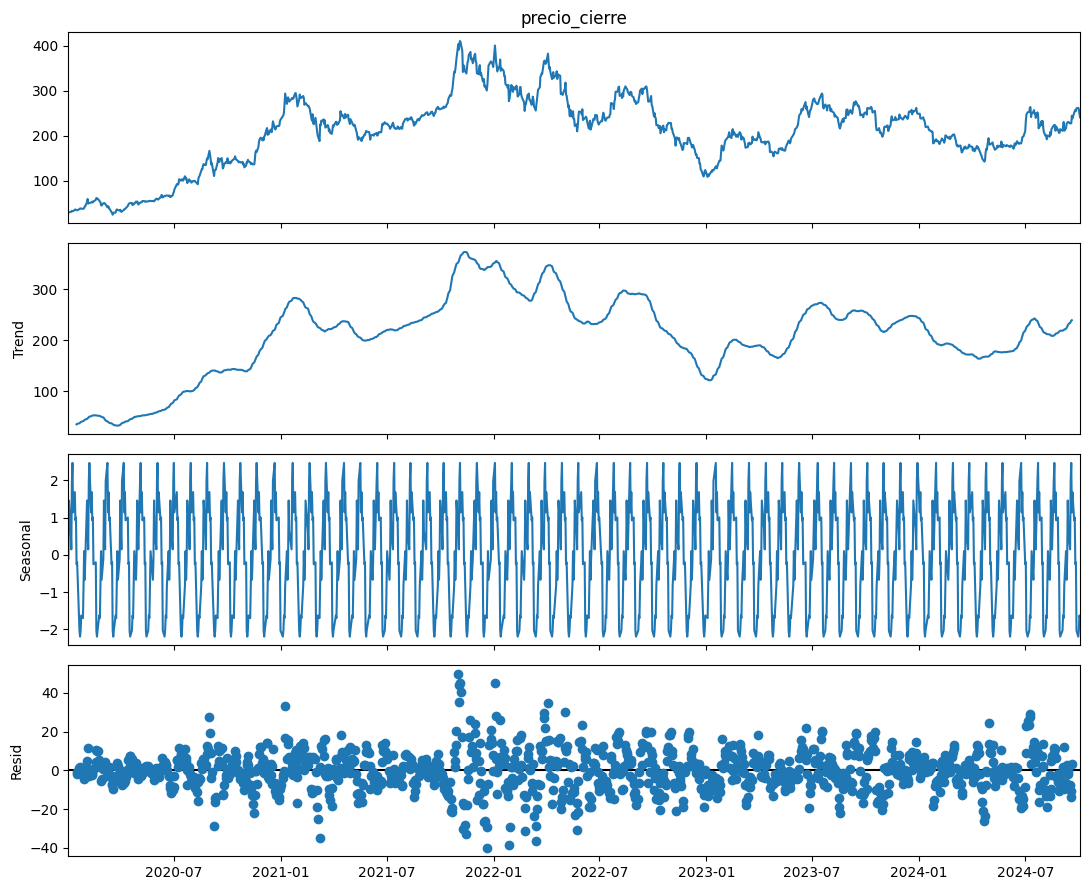

In [25]:
result2.plot()
plt.show()

Perfecto! Interpretemos los gráficos de resultados:

- Del gráfico de tendencia observamos que efectivamente existe una tendencia creciente aunque menos clara que con el parámetro de 253
- Del gráfico de ciclo, se puede observar de igual manera que existe un componente estacional
- Del gráfico de los residuos, el componente  parece ser aleatorio más en la última sección de la serie

#### Extraigamos los componentes de la serie de tiempo

In [26]:
tendencia2 = result2.trend
estacional2 = result2.seasonal
residuo2 = result2.resid

#### Importemos la prueba de Dickey Fuller para validar estacionariedad

In [27]:
X2 = residuo2.dropna()
result_DF2 = adfuller(X2)
print('ADF Statistic: %f' % result_DF2[0])
print('p-value: %f' % result_DF2[1])
print('Critical Values:')
for key, value in result_DF2[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -10.879207
p-value: 0.000000
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568


Ejecutar el ejemplo imprime el valor de la estadística de prueba de -8.09, cuanto más negativa sea esta estadística, más probable es que rechacemos la hipótesis nula (Ho: No tenemos un conjunto de datos estacionario).

Como parte del resultado, obtenemos una tabla de consulta para ayudar a determinar la estadística ADF. Podemos ver que nuestro valor estadístico de -8.25 es menor que el valor de -3.44 al 1%, y a -2.864 al 5%, por lo que podemos rechazar la hipótesis nula con un nivel de significancia del 1% y 5%.

Rechazar la hipótesis nula significa que el proceso no tiene raíz unitaria y, a su vez, que la serie temporal es estacionaria o no tiene una estructura dependiente del tiempo.

Para finalizar, comparemos los otros dos modelos con el de mayor granularidad que corresponde al período de 5 o 5 días a la semana.

In [28]:
result3 = seasonal_decompose(df.precio_cierre[df.index>"2020"], model='additive', period=5)

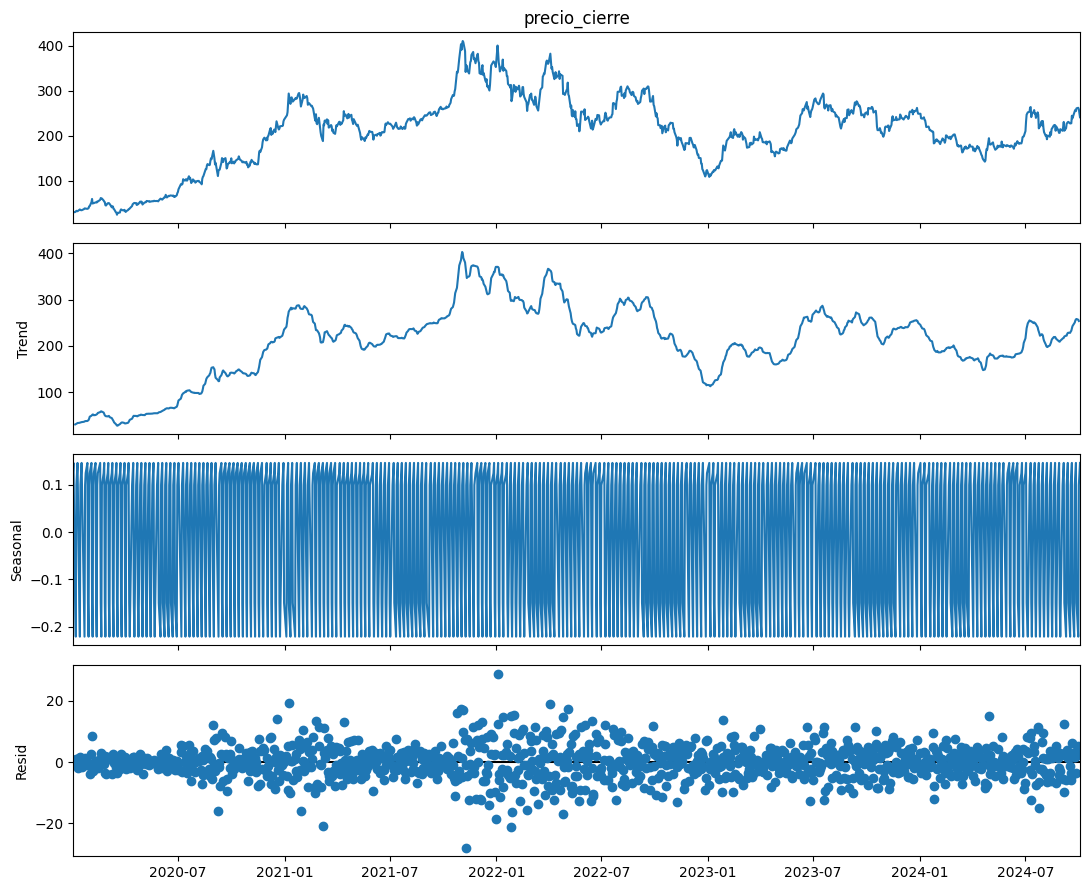

In [29]:
result3.plot()
plt.show()

Perfecto! Interpretemos los gráficos de resultados:

- Del gráfico de tendencia observamos que efectivamente existe una tendencia creciente aunque menos clara que con el parámetro de 253
- Del gráfico de ciclo, se puede observar de igual manera que existe un componente estacional pero como el período es pequeño los resultados se encuentran casi sobrepuestos
- Del gráfico de los residuos, el componente  parece ser aleatorio en la última sección de la serie

#### Extraigamos los componentes de la serie de tiempo

In [30]:
tendencia3 = result3.trend
estacional3 = result3.seasonal
residuo3 = result3.resid

#### Importemos la prueba de Dickey Fuller para validar estacionariedad

In [31]:
X3 = residuo3.dropna()
result_DF3 = adfuller(X3)
print('ADF Statistic: %f' % result_DF3[0])
print('p-value: %f' % result_DF3[1])
print('Critical Values:')
for key, value in result_DF3[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -12.699187
p-value: 0.000000
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568


Ejecutar el ejemplo imprime el valor de la estadística de prueba de -10.43, cuanto más negativa sea esta estadística, más probable es que rechacemos la hipótesis nula (Ho: No tenemos un conjunto de datos estacionario).

Como parte del resultado, obtenemos una tabla de consulta para ayudar a determinar la estadística ADF. Podemos ver que nuestro valor estadístico de -13.65 es menor que el valor de -3.44 al 1%, y a -2.864 al 5%, por lo que podemos rechazar la hipótesis nula con un nivel de significancia del 1% y 5%.

Rechazar la hipótesis nula significa que el proceso  tiene raíz unitaria y, a su vez, que la serie temporal es estacionaria o no tiene una estructura dependiente del tiempo.

### Conclusión:

Si comparamos los p-valor de los 3 modelos, observamos que todos pasan la prueba de estacionariedad por Dickey Fuller. En este caso, escogeremos el modelo con el menor p-valor sin llegar al tercer modelo, ya que los datos del componente estacional se sobreponen, por lo que personalmente me quedaría con el primer modelo dado que capturó de mejor manera la tendencia y ciclo.:

result1 = seasonal_decompose(df.precio_cierre, model='additive', period=253)

### Próximos pasos:

Excelente!

El siguiente paso es predecir, teniendo en cuenta que aunque la técnica de descomposición se usa principalmente para ayudar a analizar y comprender series temporales históricas, también puede resultar útil cuando se intenta un análisis predictivo. Así, y dado que contamos con cada componente separado, podríamos emplear métodos que se adapten mejor a cada componente.

El método a seguir va a ser, tomar los componentes obtenidos previamente, predecirlos individualmente y mediante el método aditivo los sumaremos para obtener nuestra predicción total:

$$ Y(t) = Tendencia + estacionalidad + ciclo + componente.irregular $$

Componentes obtenidos:

In [32]:
tendencia1.dropna(inplace=True)
estacional1.dropna(inplace=True)
residuo1.dropna(inplace=True)

### Loop para obtener las predicciones mediante el modelo aditivo

In [33]:
modelo_aditivo = tendencia1 + estacional1 + residuo1
df_componentes = pd.concat([tendencia1, estacional1, residuo1, modelo_aditivo, df.precio_cierre], axis=1)
df_componentes.columns = ['tendencia', 'estacional', 'residuo', 'modelo_aditivo', 'y_observado']
df_componentes.dropna(inplace=True)
df_componentes.tail(8)

,tendencia,estacional,residuo,modelo_aditivo,y_observado
Date,,,,,
2024-03-25,209.231542,-13.101612,-23.499925,172.630005,172.630005
2024-03-26,209.279526,-10.225908,-21.383619,177.669998,177.669998
2024-03-27,209.308103,-2.920980,-26.557121,179.830002,179.830002
2024-03-28,209.372688,-3.918546,-29.664149,175.789993,175.789993
2024-04-01,209.456206,-6.249890,-27.986315,175.220001,175.220001
2024-04-02,209.502213,-6.770112,-36.102097,166.630005,166.630005
2024-04-03,209.497470,-1.143402,-39.974063,168.380005,168.380005
2024-04-04,209.454229,2.499864,-40.844093,171.110001,171.110001


Como podemos observar, los componentes de las acciones de TESLA suman nuestro valor observado. Ahora, para probar nuestro modelo, predeciremos 7 días adelante dentro del mes de abril y compararemos con los y_observados o valores reales.

Ahora, pronosticaremos el componente estacional, usando el valor de t-1. (método ingenuo estacional):

In [34]:
df_predicciones = df_componentes.iloc[-8:,:]
df_predicciones.estacional = df_componentes.iloc[-8:,:].estacional.shift(1)
df_predicciones = df_predicciones.drop('y_observado', axis=1)
df_predicciones[['tendencia', 'residuo', 'modelo_aditivo']] = np.nan
df_predicciones

,tendencia,estacional,residuo,modelo_aditivo
Date,,,,
2024-03-25,NaN,NaN,NaN,NaN
2024-03-26,NaN,-13.101612,NaN,NaN
2024-03-27,NaN,-10.225908,NaN,NaN
2024-03-28,NaN,-2.920980,NaN,NaN
2024-04-01,NaN,-3.918546,NaN,NaN
2024-04-02,NaN,-6.249890,NaN,NaN
2024-04-03,NaN,-6.770112,NaN,NaN
2024-04-04,NaN,-1.143402,NaN,NaN


Los valores del modelo_aditivo, se pronostican entonces usando simplemente la última tendencia y los últimos valores de tendencia y residuo (método ingenuo). Por supuesto, aquí también podríamos usar una técnica más compleja como un modelo ARMA no estacional pero por el momento lo mantendremos sencillo.

In [35]:
df_predicciones['tendencia'] = df_componentes.loc[df_predicciones.index[-1]].tendencia
df_predicciones['residuo'] = df_componentes.loc[df_predicciones.index[-1]].residuo
df_predicciones['modelo_aditivo'] = df_predicciones['tendencia'] + df_predicciones['estacional'] + df_predicciones['residuo']
df_predicciones['y_observado'] = df_componentes.iloc[-8:,:].y_observado
df_predicciones.dropna(inplace=True)
df_predicciones

,tendencia,estacional,residuo,modelo_aditivo,y_observado
Date,,,,,
2024-03-26,209.454229,-13.101612,-40.844093,155.508525,177.669998
2024-03-27,209.454229,-10.225908,-40.844093,158.384228,179.830002
2024-03-28,209.454229,-2.920980,-40.844093,165.689157,175.789993
2024-04-01,209.454229,-3.918546,-40.844093,164.691591,175.220001
2024-04-02,209.454229,-6.249890,-40.844093,162.360247,166.630005
2024-04-03,209.454229,-6.770112,-40.844093,161.840025,168.380005
2024-04-04,209.454229,-1.143402,-40.844093,167.466735,171.110001


### Comparamos las predicciones

In [36]:
df_predicciones['diferencia']=df_predicciones.y_observado - df_predicciones.modelo_aditivo
df_predicciones

,tendencia,estacional,residuo,modelo_aditivo,y_observado,diferencia
Date,,,,,,
2024-03-26,209.454229,-13.101612,-40.844093,155.508525,177.669998,22.161474
2024-03-27,209.454229,-10.225908,-40.844093,158.384228,179.830002,21.445773
2024-03-28,209.454229,-2.920980,-40.844093,165.689157,175.789993,10.100837
2024-04-01,209.454229,-3.918546,-40.844093,164.691591,175.220001,10.528410
2024-04-02,209.454229,-6.249890,-40.844093,162.360247,166.630005,4.269758
2024-04-03,209.454229,-6.770112,-40.844093,161.840025,168.380005,6.539980
2024-04-04,209.454229,-1.143402,-40.844093,167.466735,171.110001,3.643266


Perfecto, hemos predicho mediante el método básico.

Como podemos ver, el modelo por descomposición tiene algunas fuertes diferencias en el mes de abril del presente año, por ello ahora aplicaremos técnicas más avanzadas como lo son los modelos autoregresivos y de medias móviles.

### Mejoremos las prediciones!

Creemos una funci'on para que genere valores futuros y qque no sea naive `generate_forecast`:

1. `trend` y `seasonal`: son las componentes de tendencia y estacionalidad de la serie temporal. Estas son las series que se han obtenido mediante la descomposición de la serie original.

2. `residual_mean` y `residual_std`: son la media y la desviación estándar del componente de residuos de la serie original. Estos valores se han calculado previamente y se utilizan para generar los residuos aleatorios en la predicción futura.

3. `periods`: es el número de períodos hacia el futuro para los cuales se desea generar la predicción.

4. `future_trend`: esta línea de código genera la tendencia futura, utilizando la última observación de la tendencia conocida, y luego agregando el cambio promedio de la tendencia en cada período futuro. El cambio promedio se calcula dividiendo la diferencia entre la última y la primera observación de la tendencia por el número total de períodos en la serie.

5. `future_seasonal`: esta línea de código extrae los últimos períodos de la componente de estacionalidad conocida, que se utilizarán como la estacionalidad futura en la predicción.

6. `future_residual`: esta línea de código genera una serie de residuos aleatorios con la misma media y desviación estándar que el componente de residuos conocido.

7. Por último, se devuelve la suma de la tendencia futura, la estacionalidad futura y los residuos futuros para cada período.

In [37]:
tendencia1.tail(3)

,trend
Date,
2024-04-02,209.502213
2024-04-03,209.497470
2024-04-04,209.454229


In [38]:
tendencia1.iloc[-1]

209.4542292417745

In [39]:
residual_mean = np.mean(residuo1)
residual_std = np.std(residuo1)

In [40]:
# Define a function to generate future values based on the decomposed components
def generate_forecast(trend, seasonal, residual_mean, residual_std, periods=1):
    future_trend = trend.iloc[-1] + np.arange(1, periods+1) * ((trend.iloc[-1] - trend.iloc[0]) / (len(trend)-1))
    future_seasonal = seasonal.iloc[-periods:]
    future_residual = np.random.normal(residual_mean, residual_std, periods)
    return future_trend + future_seasonal + future_residual

In [41]:
# Generate a forecast for the next 10 periods
forecast = generate_forecast(tendencia1, estacional1, residual_mean, residual_std, periods=1)

# Print the forecasted values
print(forecast)

Date
2024-10-03    219.991525
Name: seasonal, dtype: float64


In [42]:
#setear = set_sedd= 1234  semilla

# Modelos estacionarios univariados

### Los datos

En el presente script, continuaremos trabajando con acciones de Tesla por lo que importaremos la serie directamente de Yahoo Finance: https://finance.yahoo.com/quote/TSLA?p=TSLA&.tsrc=fin-srch

In [43]:
#Llamemos al module
import pandas_datareader as pdr

#### Carguemos los datos

In [44]:
import yfinance as yf

# Set the ticker symbol
ticker_symbol = 'TSLA'

# Request the data from Yahoo Finance
df = yf.download(ticker_symbol)

# Print the data info
print(df.info())

[*********************100%***********************]  1 of 1 completed

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3591 entries, 2010-06-29 to 2024-10-03
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3591 non-null   float64
 1   High       3591 non-null   float64
 2   Low        3591 non-null   float64
 3   Close      3591 non-null   float64
 4   Adj Close  3591 non-null   float64
 5   Volume     3591 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 196.4 KB
None


Perfecto hemos recopilado la data de las cotizaciones de las acciones de Tesla desde el año 2017 hasta el presente año y mes, por lo que tenemos un total de 1257 observaciones sin valores perdidos y tres columnas: el valor máximo de cotización en ese día, el valor mínimo de cotización en ese día, su valor a la apertura en la bolsa, su valor al cierre, el volumen de las acciones que se comercializaron en ese día y el valor ajustado al cierre que modifica el precio de cierre de una acción para reflejar el valor de esa acción después de contabilizar cualquier acción corporativa.

Como es habitual procedamos a reemplazar los nombres de las columnas a español:

#### Recodificar el nombre de las columnas a español

In [45]:
df.rename({'Open':'precio_apertura', 'High':'precio_max', 'Low': 'precio_min',
           'Close': 'precio_cierre', 'Adj Close':'precio_ajustado_cierre', 'Volume': 'Volumen'}, axis=1, inplace=True)

In [46]:
df

,precio_apertura,precio_max,precio_min,precio_cierre,precio_ajustado_cierre,Volumen
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
2010-07-07,1.093333,1.108667,0.998667,1.053333,1.053333,103825500
2010-07-08,1.076000,1.168000,1.038000,1.164000,1.164000,115671000
2010-07-09,1.172000,1.193333,1.103333,1.160000,1.160000,60759000
2010-07-12,1.196667,1.204667,1.133333,1.136667,1.136667,33037500


## Modelación de la serie de TESLA

#### Importemos las librerías necesarias

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### 1. Verificar si la serie es estacionaria

Intuitivamente sabemos que la serie no es estacionaria ya que en el script anterior logramos estacionariedad al descomponerla en sus componentes, pero a manera de ejemplo en el presente script usaremos la prueba ADF para asegurarnos.

Recordemos que, usamos la función adfuller de la biblioteca statsmodels y extraemos la estadística ADF y el valor p. Si el estadístico ADF es un número negativo grande y el valor p es menor que 0.05, entonces nuestra serie es estacionaria. De lo contrario, debemos aplicar transformaciones.

In [48]:
from statsmodels.tsa.stattools import adfuller

In [49]:
#utilizamos la variable original para evaluar estacionariedad
result_DF = adfuller(df.precio_cierre[df.index>"2020"])
print('ADF Statistic: %f' % result_DF[0])
print('p-value: %f' % result_DF[1])
print('Critical Values:')
for key, value in result_DF[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.633113
p-value: 0.086345
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568


Nuestro estadístico de ADF de -2.30 y nuestro valor p es de 0.17. Aquí, la estadística ADF no es un número negativo grande y el valor "p" es mayor que 0,05. Por lo tanto, nuestra serie de tiempo no es estacionaria, y debemos aplicar transformaciones para hacerla estacionaria.

Para que nuestra serie sea estacionaria, intentaremos estabilizar la tendencia aplicando una diferenciación de primer orden:

$$ d^1_t=Y_{t}-Y_{t-1} $$

PASO 1: sacar la primera diferencia

In [50]:
precio_cierre_diff = df.precio_cierre[df.index>"2020"].diff(1).dropna()

In [51]:
precio_cierre_diff

,precio_cierre
Date,
2020-01-03,0.850000
2020-01-06,0.568666
2020-01-07,1.167999
2020-01-08,1.538668
2020-01-09,-0.720001
2020-01-10,-0.212666
2020-01-13,3.113998
2020-01-14,0.870667
2020-01-15,-1.294666


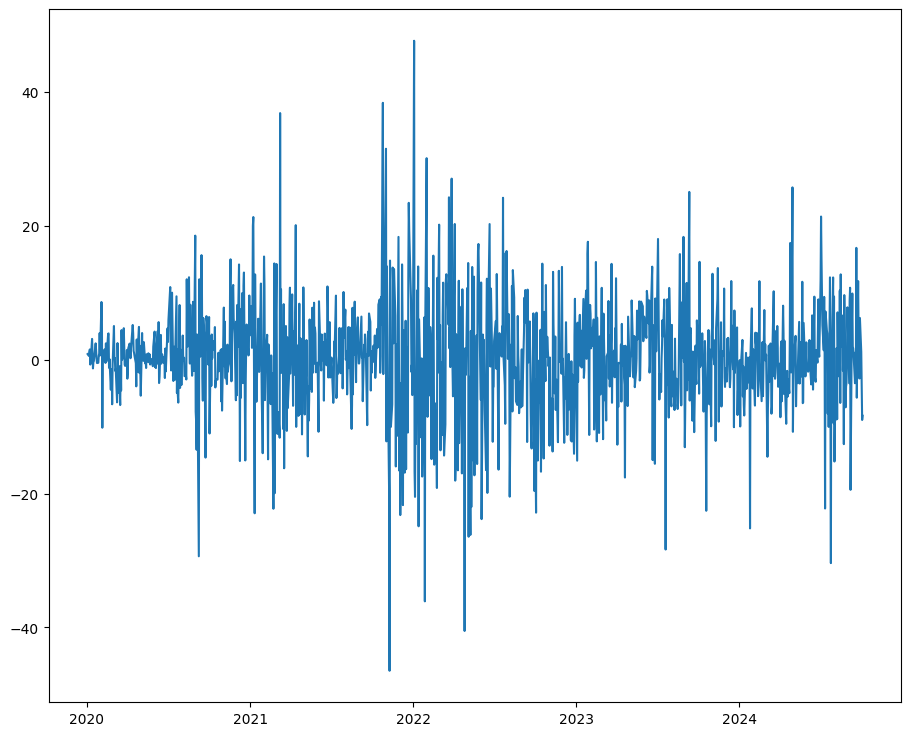

In [52]:
plt.plot(precio_cierre_diff)

Con una transformación aplicada a nuestra serie, podemos probar la estacionariedad nuevamente usando la prueba ADF:

PASO 2: comprobamos estacionariedad

In [53]:
result_DF_diff = adfuller(precio_cierre_diff)
print('ADF Statistic: %f' % result_DF_diff[0])
print('p-value: %f' % result_DF_diff[1])
print('Critical Values:')
for key, value in result_DF_diff[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -6.798144
p-value: 0.000000
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568


Esto da una estadística ADF de -8.92 y un valor p de  0. Por lo tanto, con una estadística ADF negativa grande y un valor p mucho menor que 0,05, podemos decir que nuestra serie es estacionaria.

Nuestro siguiente paso es trazar la función de autocorrelación y autocorrelación parcial. La biblioteca statsmodels incluye convenientemente la función plot_acf para nosotros. Simplemente pasamos nuestra serie diferenciada y especificamos el número de retrasos en el parámetro de retrasos.

### 2. Graficar el ACF y el PACF

In [54]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
plt.rcParams["figure.figsize"] = (8,5)

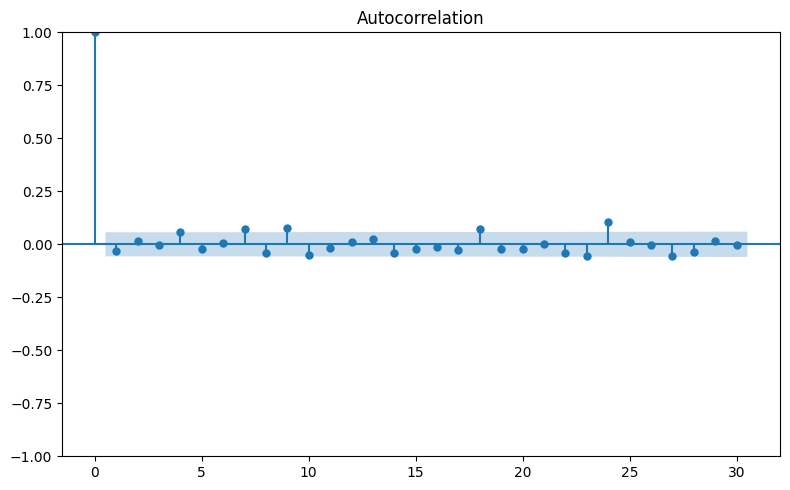

In [55]:
plot_acf(precio_cierre_diff, lags=30);
plt.tight_layout()

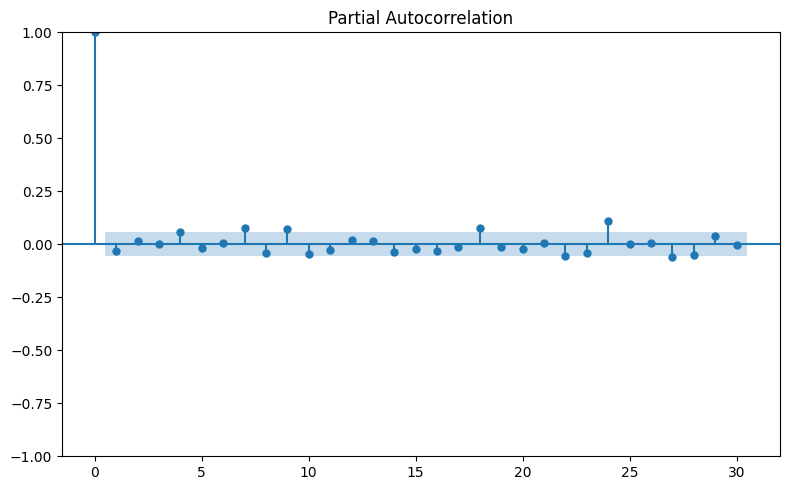

In [56]:
plot_pacf(precio_cierre_diff, lags=30);
plt.tight_layout()

Como podemos observar no existe un comportamiento claro en los gráficos de ACF y PACF, esto en gran medida, se debe a que estamos trabajando con una serie de tiempo diaria que recoge mucho ruido y variabilidad. Recuerden que en la primera tarea de esta semana se pidió trabajar o con una serie semanal o mensual, por lo que en este script ejemplificaremos que sucede con una serie mensual para disminuir las distorsiones excesivas diarias propias de las acciones e incrementar así, su poder predictivo.

#### AR (p)

Para el proceso autoregresivo y conforme a la tabla de la sección teórica, requerimos que el ACF decaiga hacia cero y que haya una posible oscilación, la cual existe por lo cual sabemos que esta serie de tiempo es autoregresiva.

Para su orden, inspeccionamos el PACF, donde los rezagos en 4, 7 son significativos. Luego existe una sección en donde los rezagos 8, 11 y 15 son significativos. Tomemos inicialmente el último rezago significativo del primer grupo AR (4) que es el primer rezago del bloque donde los rezagos a seguir se vuelven no significantes.

#### MA (q)

Para el proceso de medias móviles y conforme a la tabla de la sección teórica, requerimos que el PACF decaiga hacia cero y que haya una posible oscilación. Este componente es menos claro que en el proceso autoregresivo ya que existen varios rezagos que rompen los intervalos de confianza.

Como podemos ver en el ACF, los únicos rezagos significativos son el 4 y el 7. Probaremos inicialmente con MA(4)

### 3. Determinar el modelo

Teniendo en cuenta que partimos de una serie diferenciada, nuestro modelo contará con el componente de integración 1, dado que alcanzó la estacionariedad aplicado las primeras diferencias. Además, en virtud que encontramos autocorrelaciones y aurocorrelaciones parciales significativas, probaremos un modelo ARIMA importando la función arima y especificando loc componentes "p", "q" y "d" que corresponde a la diferenciación.

In [57]:
from statsmodels.tsa.arima.model import ARIMA

Recordemos que AR está en función de (p) y MA en función de (q):

In [58]:
#Definimos el orden de los componentes:
p = 4 #  Un valor de p de 4 significa que se utilizarán los últimos 4 valores de la serie temporal para predecir el siguiente valor.
d = 1 # Un valor de d de 1 indica que se realizará una diferenciación de primer orden para hacer que la serie temporal sea estacionaria.
q = 4 #Un valor de q de 4 significa que se utilizarán los últimos 4 errores de predicción para predecir el siguiente valor.

In [59]:
modelo1 = ARIMA(df.precio_cierre[df.index>"2020"], order=(p, d, q))
resultado1 = modelo1.fit()
print(resultado1.summary())

                               SARIMAX Results                                
Dep. Variable:          precio_cierre   No. Observations:                 1197
Model:                 ARIMA(4, 1, 4)   Log Likelihood               -4228.720
Date:                Fri, 04 Oct 2024   AIC                           8475.439
Time:                        00:02:24   BIC                           8521.220
Sample:                             0   HQIC                          8492.687
                               - 1197                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0697      0.210     -0.333      0.739      -0.481       0.341
ar.L2          1.0393      0.176      5.891      0.000       0.694       1.385
ar.L3          0.3139      0.141      2.229      0.0

Como podemos observar, recibimos un mensaje en el que la optimización falla, y producto de ello, todos los coeficientes son no-significativos o la mayorìa de ellos.

He aquí donde tenemos que intentar varias combinaciones. Mi primera sugerencia sería eliminar el proceso de medias móviles ya que es aquel que es menos significativo y ver que nos devuelve el modelo:

In [60]:
#Definimos el orden de los componentes:
p = 0 #eliminamos el proceso AR
d = 1
q = 0 # eliminando el proceso MA

In [61]:
modelo1 = ARIMA(df.precio_cierre[df.index>"2020"], order=(p, d, q))
resultado1 = modelo1.fit()
print(resultado1.summary())

                               SARIMAX Results                                
Dep. Variable:          precio_cierre   No. Observations:                 1197
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -4237.875
Date:                Fri, 04 Oct 2024   AIC                           8477.749
Time:                        00:02:24   BIC                           8482.836
Sample:                             0   HQIC                          8479.666
                               - 1197                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        70.0276      1.708     40.999      0.000      66.680      73.375
Ljung-Box (L1) (Q):                   1.26   Jarque-Bera (JB):               664.50
Prob(Q):                              0.26   Pr

#### verificando a priori nuestro guess con: Autoarima!!!

In [62]:
!pip install pmdarima


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 34.2 MB/s eta 0:00:00


In [63]:
from pmdarima.arima import auto_arima

# Create an auto ARIMA model
model = auto_arima(df.precio_cierre[df.index>"2020"], seasonal=False, suppress_warnings=True, error_action="ignore")

# Print the model summary
print(model.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1197
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -4237.875
Date:                Fri, 04 Oct 2024   AIC                           8477.749
Time:                        00:02:33   BIC                           8482.836
Sample:                             0   HQIC                          8479.666
                               - 1197                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        70.0276      1.708     40.999      0.000      66.680      73.375
Ljung-Box (L1) (Q):                   1.26   Jarque-Bera (JB):               664.50
Prob(Q):                              0.26   Pr

Muchísimo mejor.

El resumen del modelo proporciona varias medidas estadísticas para evaluar el rendimiento de nuestro modelo, por ejemplo: los parámetros de los coeficientes son altamente significativos ya que todos tienen un valor p inferior a 0,05. por lo que, nos quedaremos con este modelo, y pronosticaremos los valores con esta definición matemática.

### 4. Predicciones modelo AR

In [64]:
from statsmodels.graphics.tsaplots import plot_predict

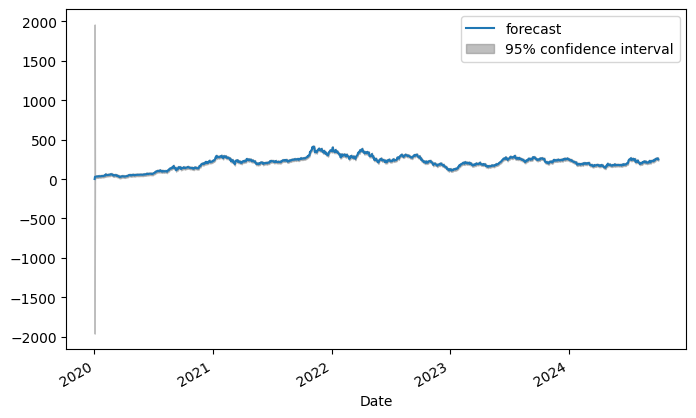

In [65]:
plot_predict(resultado1, dynamic=False)
plt.show()

## Generar las predicciones en datos que el modelo nunca ha visto separando la base de datos en 70% y 30%

In [66]:
train_data=df.precio_cierre[0:int(len(df.precio_cierre)*0.7)]
test_data=df.precio_cierre[int(len(df.precio_cierre)*0.7):]

### For loop para generar cada predicción

In [67]:
historico = train_data.tolist()
predicciones = []
n = len(test_data)
for time_point in range(n):
    model = ARIMA(historico, order=(p,d,q))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predicciones.append(yhat)
    true_test_value = test_data[time_point]
    historico.append(true_test_value)

### Gráfico comparativo de las predicciones punto a punto

In [68]:
p

0

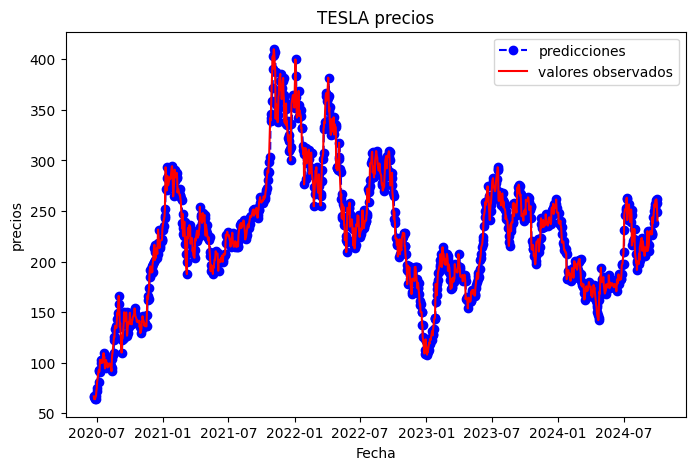

In [69]:
rango = df.precio_cierre[int(len(df.precio_cierre)*0.7):].index
plt.plot(rango, predicciones, color='blue', marker='o', linestyle='dashed', label='predicciones')
plt.plot(rango, test_data, color='red', label='valores observados')
plt.title('TESLA precios')
plt.xlabel('Fecha')
plt.ylabel('precios')

plt.legend()
plt.show()

El modelo sòlo diferenciado, parece predecir decentemente a una frecuencia diaria, ya que los valores reales se encuentran fluctuando alrededor de los valores pronosticados.

Grafiquemos los residuos para asegurarnos de que no haya patrones, intentando identificar la media y la varianza constantes:

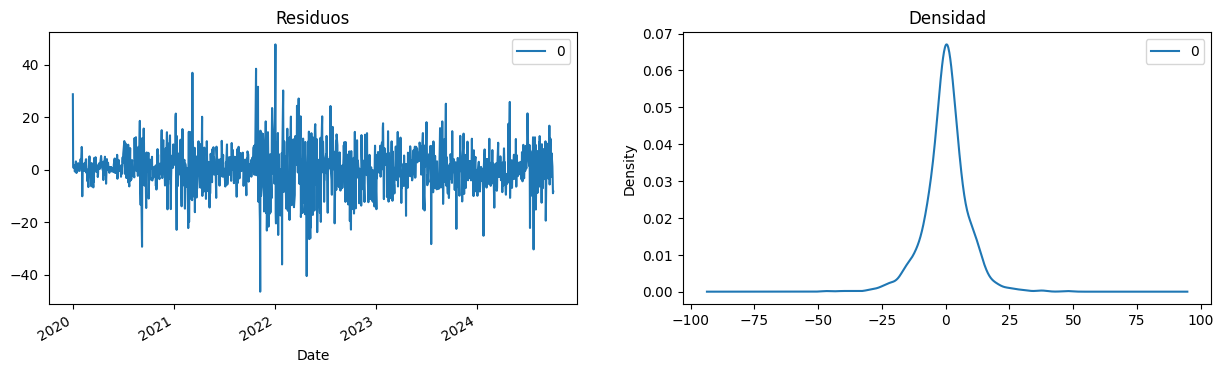

In [82]:
residuos = pd.DataFrame(resultado1.resid)
fig, ax = plt.subplots(1,2, figsize=(15,4))
residuos.plot(title = "Residuos", ax = ax[0])
residuos.plot(kind = 'kde', title = 'Densidad', ax = ax[1])
plt.show()

En el ejemplo anterior, hemos trazado los errores residuales y los gráficos de densidad. Podemos observar que los errores residuales parecen oscilar al alrededor de cero aunque no exctamente y una varianza uniforme en los años posteriores.

## SARIMAX

# 📊 Modelo SARIMAX: Explicación y Aplicaciones

## ¿Qué es SARIMAX?
**SARIMAX (Seasonal AutoRegressive Integrated Moving Average with eXogenous variables)** es un modelo estadístico utilizado para analizar y **predecir series temporales**. SARIMAX extiende el modelo **ARIMA** al incorporar tanto la **estacionalidad** como **variables exógenas** que pueden influir en el comportamiento de la serie. Es especialmente útil cuando se tiene una serie de datos que muestra **patrones repetitivos** (como ciclos anuales o mensuales) o cuando existen **factores externos** que afectan la variable que se desea predecir.

## Componentes del Modelo SARIMAX
SARIMAX combina varios componentes para capturar las distintas características de una serie temporal:

- **AR (Autoregressive)**: Representa la dependencia entre un valor y los valores anteriores de la serie. Definido por el parámetro **p**.
- **I (Integrated)**: Indica el número de veces que los datos deben ser diferenciados para lograr una serie estacionaria. Definido por el parámetro **d**.
- **MA (Moving Average)**: Modela la dependencia entre un valor y los errores residuales de observaciones anteriores. Definido por el parámetro **q**.
- **S (Seasonal)**: Captura patrones que se repiten a intervalos regulares (como las estaciones del año). Incluye componentes estacionales autoregresivos, integrados y de promedio móvil, definidos por **P, D, Q** y **m** (donde **m** es la periodicidad del patrón estacional).
- **X (eXogenous Variables)**: Se refiere a la inclusión de **variables exógenas** que afectan la serie, lo que permite modelar el impacto de factores externos en la serie de tiempo.

## Notación de SARIMAX
La notación general para un modelo SARIMAX es:

$$
SARIMAX(p, d, q) \times (P, D, Q, m)
$$

Donde:
- **(p, d, q)**: Representan los componentes ARIMA.
- **(P, D, Q, m)**: Representan los componentes estacionales, y **m** es el número de periodos en el ciclo estacional (por ejemplo, **12** para datos mensuales que muestran un ciclo anual).

## Aplicaciones de SARIMAX
**SARIMAX** se utiliza en una variedad de campos para **predicción y análisis de series temporales**:

- **Finanzas**: Predicción de precios de activos financieros, como acciones o criptomonedas.
- **Ventas y Marketing**: Estimación de la demanda de productos que presenta patrones estacionales, como ventas de ropa de invierno.
- **Producción de Energía**: Predicción del consumo de energía eléctrica, que varía según las estaciones del año y otros factores externos.
- **Clima**: Modelar y predecir variables meteorológicas como temperaturas, precipitaciones y vientos.

## Ventajas del Modelo SARIMAX
- **Captura la Estacionalidad**: A diferencia de ARIMA, **SARIMAX** puede modelar patrones estacionales explícitos, lo cual es crucial para series con repeticiones periódicas.
- **Incorpora Variables Exógenas**: Permite incluir factores externos (como indicadores económicos) que puedan afectar la variable de interés, mejorando la capacidad predictiva.
- **Versatilidad**: Puede ser aplicado a una amplia gama de problemas donde se tiene tanto estacionalidad como influencia de factores externos.

## Conclusión
**SARIMAX** es una herramienta poderosa para el análisis de series temporales complejas, que no solo presentan **tendencias y estacionalidades**, sino que también están influenciadas por **variables externas**. Gracias a su capacidad para capturar estos elementos, **SARIMAX** se convierte en una opción ideal para predecir series temporales en escenarios reales, logrando modelos robustos y con alto poder predictivo.


In [71]:
from pmdarima import auto_arima
import pandas as pd

# Asegurémonos de que tenemos el DataFrame adecuado
# Suponemos que `df` contiene una columna llamada `precio_cierre` y un índice de fechas

# Filtrar los datos desde 2020
df_filtered = df[df.index > "2020"]

# Crear un modelo auto ARIMA que considere la estacionalidad (SARIMAX)
sarimax_model = auto_arima(df_filtered['precio_cierre'],
                           seasonal=True,        # Activar la estacionalidad,  Esta opción indica que queremos incluir un componente de estacionalidad en el modelo, lo cual convierte el modelo de ARIMA a SARIMAX.
                           m=12,                 # Estacionalidad de los datos (por ejemplo, 12 si los datos son mensuales)
                           stepwise=True,        # Utilizar búsqueda escalonada para encontrar los mejores parámetros
                           suppress_warnings=True,
                           error_action="ignore",
                           trace=True)           # Mostrar los pasos para ajustar los modelos

# Imprimir el resumen del modelo
print(sarimax_model.summary())

# Predecir los próximos 12 periodos
forecast = sarimax_model.predict(n_periods=12)

# Mostrar las predicciones
print(forecast)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=8485.606, Time=8.87 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=8479.213, Time=0.07 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=8481.831, Time=0.84 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=8481.889, Time=1.38 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=8477.749, Time=0.09 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=8481.100, Time=0.93 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=8481.120, Time=0.85 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=8480.593, Time=4.13 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=8479.952, Time=0.44 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=8479.988, Time=1.14 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=8481.228, Time=2.90 sec

Best model:  ARIMA(0,1,0)(0,0,0)[12]          
Total fit time: 21.803 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:     

## 🌟 Ventajas del Uso de `auto_arima` para SARIMAX

- **Automatización**: `auto_arima` permite automatizar la selección de los mejores valores para los componentes **p, d, q** y **P, D, Q** del modelo **SARIMAX**.

- **Ahorro de Tiempo**: En lugar de ajustar manualmente múltiples modelos, `auto_arima` realiza la búsqueda automáticamente, probando varias combinaciones para encontrar la que minimiza algún criterio (como el **AIC**).

- **Estacionalidad**: Incluyendo la estacionalidad (`seasonal=True` y definiendo `m`), `auto_arima` se convierte en una forma efectiva de ajustar modelos **SARIMAX** sin necesidad de especificar manualmente los parámetros estacionales.


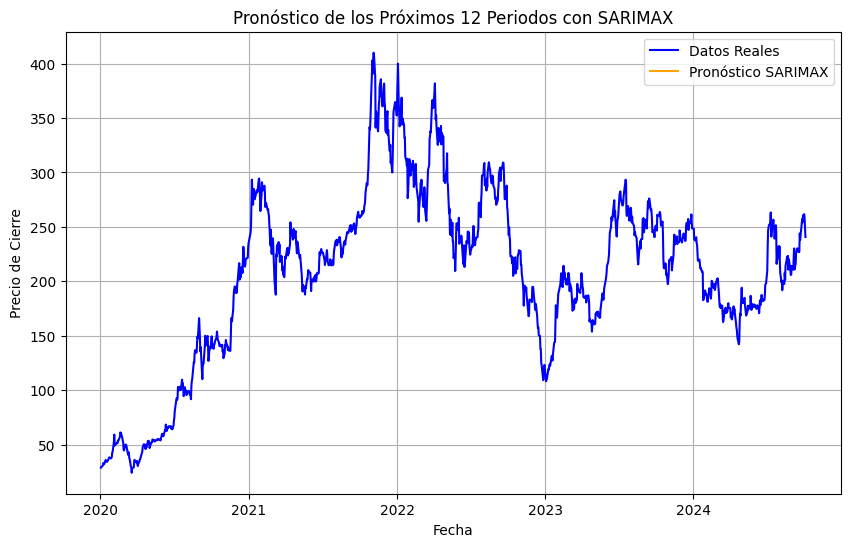

In [75]:
import matplotlib.pyplot as plt
import pandas as pd

# Supongamos que `forecast` contiene las predicciones para los próximos 12 periodos como una lista o Serie
# Crear un índice de fechas para las predicciones
last_date = df_filtered.index[-1]  # Última fecha conocida en el DataFrame original
forecast_index = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=12, freq='M')

# Crear un DataFrame para el pronóstico con el índice de fechas
forecast_df = pd.DataFrame({'Forecast': forecast}, index=forecast_index)

# Graficar los últimos valores reales y los pronosticados
plt.figure(figsize=(10, 6))

# Graficar los datos reales hasta el último punto conocido
plt.plot(df_filtered.index, df_filtered['precio_cierre'], label='Datos Reales', color='blue')

# Graficar el pronóstico
plt.plot(forecast_df.index, forecast_df['Forecast'], label='Pronóstico SARIMAX', color='orange')

# Personalización del gráfico
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre')
plt.title('Pronóstico de los Próximos 12 Periodos con SARIMAX')
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()




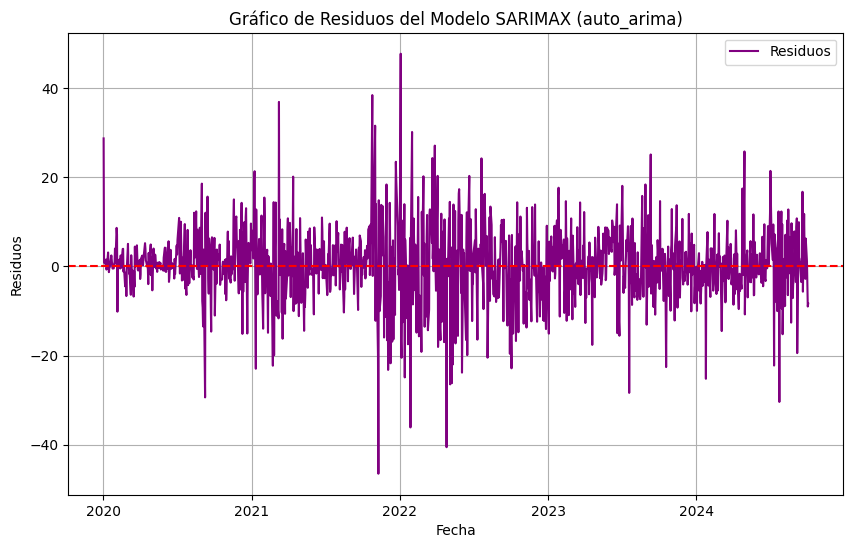

In [84]:
import matplotlib.pyplot as plt

# Obtener los residuos del modelo ajustado
residuals = pd.Series(sarimax_model.resid(), index=df_filtered.index[-len(sarimax_model.resid()):])

# Graficar los residuos
plt.figure(figsize=(10, 6))
plt.plot(residuals, color='purple', label='Residuos')
plt.axhline(y=0, color='red', linestyle='--', linewidth=1.5)

# Personalización del gráfico
plt.xlabel('Fecha')
plt.ylabel('Residuos')
plt.title('Gráfico de Residuos del Modelo SARIMAX (auto_arima)')
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()


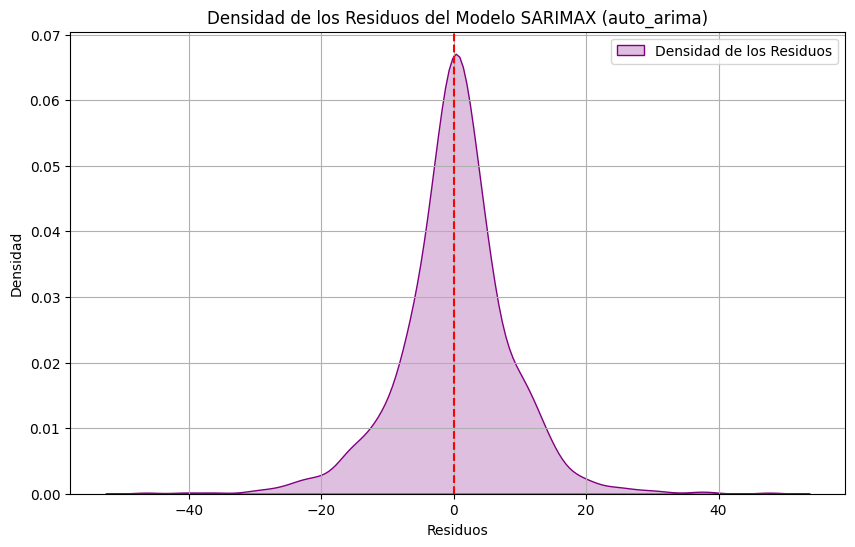

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Obtener los residuos del modelo ajustado
residuals = pd.Series(sarimax_model.resid(), index=df_filtered.index[-len(sarimax_model.resid()):])

# Crear una figura para la densidad
plt.figure(figsize=(10, 6))

# Graficar la densidad de los residuos
sns.kdeplot(residuals, color='purple', shade=True, label='Densidad de los Residuos')

# Personalización del gráfico
plt.xlabel('Residuos')
plt.ylabel('Densidad')
plt.title('Densidad de los Residuos del Modelo SARIMAX (auto_arima)')
plt.axvline(x=0, color='red', linestyle='--', linewidth=1.5)
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()


La gráfica de densidad de los residuos muestra una clara asimetría hacia la derecha, lo cual indica que el modelo SARIMAX tiene problemas de ajuste, especialmente para algunas observaciones, subestimando los valores reales. Esto sugiere que el modelo no está capturando bien ciertos patrones presentes en los datos o que existen valores atípicos que no se han modelado adecuadamente.

Para mejorar el ajuste, sería recomendable ajustar manualmente los parámetros del modelo o aplicar una transformación a los datos para reducir la asimetría. También se podría revisar la inclusión de posibles variables exógenas o refinar la captura de la estacionalidad para lograr una mejor precisión y obtener residuos más cercanos a una distribución normal centrada en cero